Decision Tree 

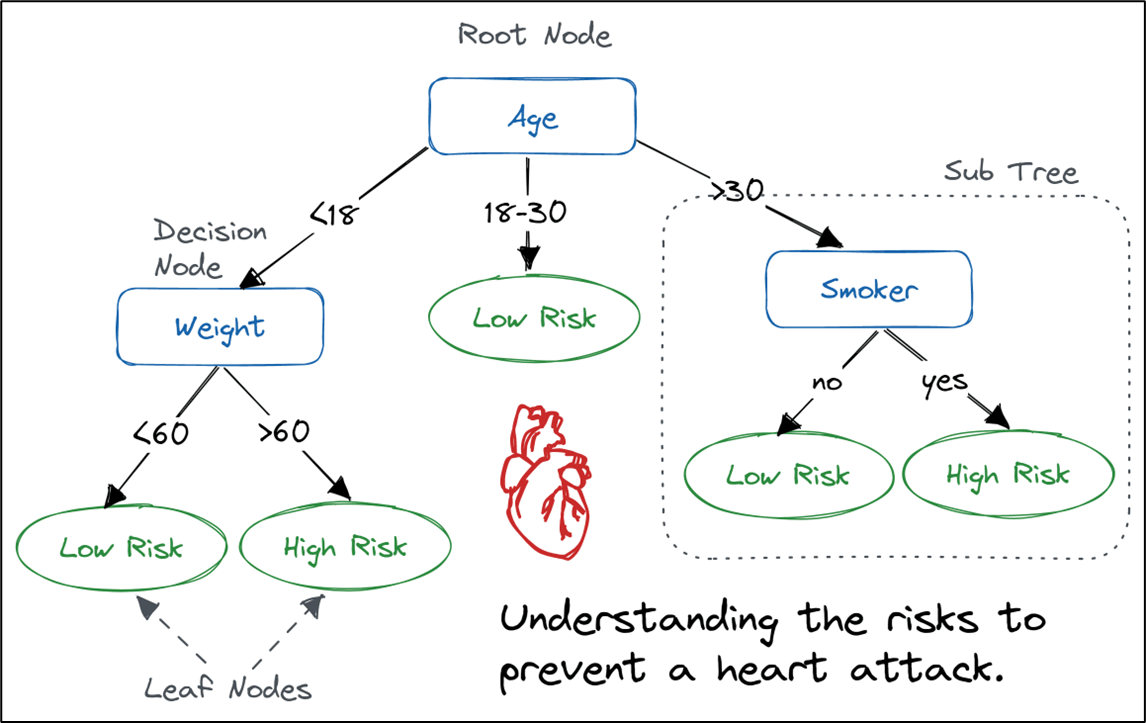

In [12]:
from warnings import filterwarnings
filterwarnings("ignore")

Read the dataset

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
df=pd.read_csv("iris.csv")

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [18]:
#check missimg values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

seperate x and y variables

In [19]:
x=df.drop(columns=["species"])
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
y=df[["species"]]
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


create a preprocessing pipeline for x

In [22]:
x.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [24]:
num_pipe=Pipeline(steps=[("impute",SimpleImputer(strategy="mean")),
                         ('scaler',StandardScaler())])

In [25]:
x_pre=num_pipe.fit_transform(x)
x_pre[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [26]:
cols=num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [27]:
x_pre=pd.DataFrame(x_pre,columns=cols)
x_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Splitting the dataset

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pre,y,test_size=0.33,random_state=21)

In [29]:
x_train.shape

(100, 4)

In [30]:
x_test.shape

(50, 4)

Create a Desicion Tree Model

In [31]:
from sklearn.tree import DecisionTreeClassifier


In [32]:
model=DecisionTreeClassifier(max_depth=1,min_samples_split=5,min_samples_leaf=3, criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3,
                       min_samples_split=5)

In [33]:
model.score(x_train,y_train)

0.67

In [34]:
model.score(x_test,y_test)

0.66

Hyperparameter Tuning

In [35]:
params={
    "max_depth":[1,2,3,4,5,6,7],
    "min_samples_split":[5,6,7,8,9],
    "criterion":["gini","entropy"]
}

In [38]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
gscv = GridSearchCV(dtc, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [39]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5}

In [40]:
gscv.best_score_

1.0

In [41]:
best_dtc=gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

Evaluate the model

In [43]:
best_dtc.score(x_train,y_train)

1.0

In [44]:
best_dtc.score(x_test,y_test)

0.94

create a confusion matrix

In [45]:
y_pred_tr=best_dtc.predict(x_train)
y_pred_ts=best_dtc.predict(x_test)

In [46]:
y_pred_tr[:5]

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [47]:
y_pred_ts[:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

display confusion matrix

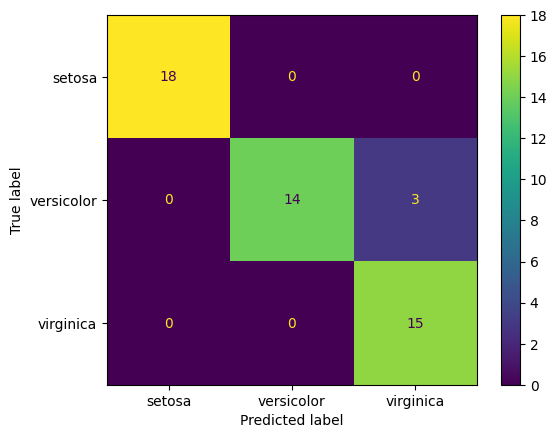

In [48]:
from sklearn.metrics import *
cf=confusion_matrix(y_test,y_pred_ts)
cfd=ConfusionMatrixDisplay(cf,display_labels=best_dtc.classes_)
cfd.plot()

display classification report

In [49]:
print(classification_report(y_test,y_pred_ts))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.82      0.90        17
   virginica       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



Display Decision tree


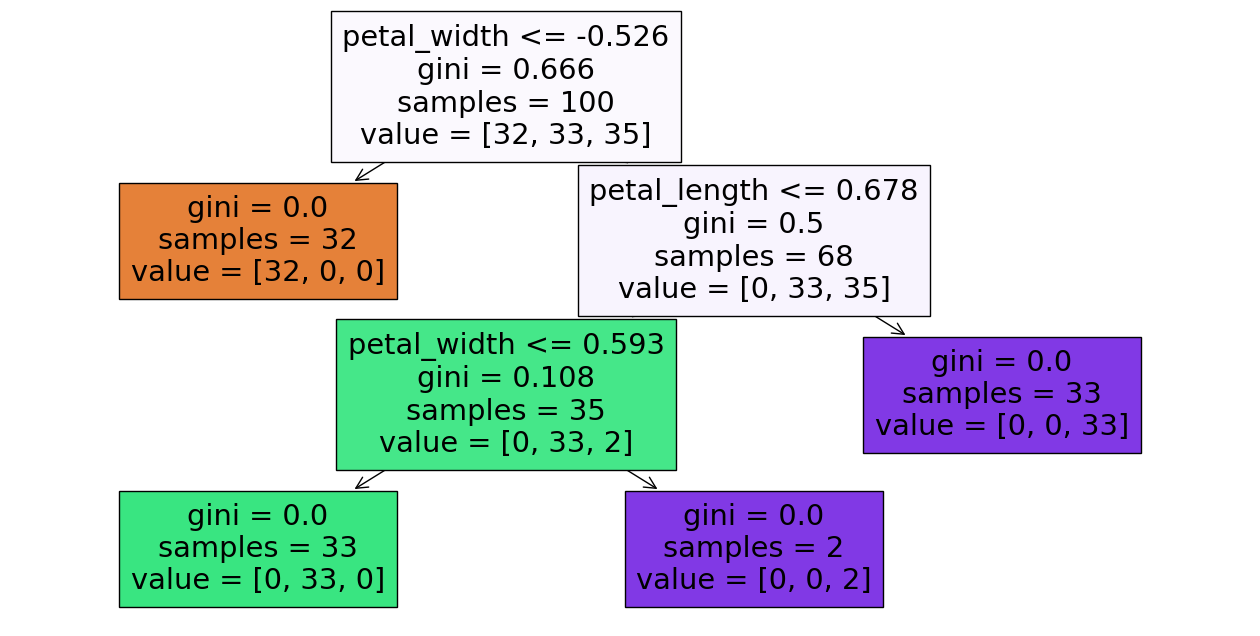

In [51]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,8))
plot_tree(best_dtc,feature_names=list(x_train.columns),filled=True)
plt.show()

Predicting the result for unseen data

In [52]:
new=pd.read_csv("iris_sample.csv")
new.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8


In [57]:
new.isna().sum()

sepal_length    0
sepal_width     1
petal_length    1
petal_width     1
dtype: int64

In [58]:
x_new_pre=num_pipe.transform(new)

In [59]:
x_new_pre[:5]

array([[-0.41600969, -1.28296331,  0.13754657,  0.13250973],
       [ 1.2803405 ,  0.09821729,  0.76275827,  1.44883158],
       [-0.90068117, -1.28296331, -0.4308277 , -0.13075464],
       [-1.74885626, -0.36217625,  0.        , -1.3154443 ],
       [ 0.06866179, -0.13197948,  0.76275827,  0.79067065]])

In [60]:
x_new_pre=pd.DataFrame(x_new_pre,columns=cols)
x_new_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671


In [67]:
prob=best_dtc.predict_proba(x_new_pre)
prob[:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [68]:
new_pred=best_dtc.predict(x_new_pre)
new_pred[:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [69]:
new["prediction"]=new_pred
new.head()

,sepal_length,sepal_width,petal_length,petal_width,prediction
0,5.5,2.5,4.0,1.3,versicolor
1,6.9,3.1,5.1,2.3,virginica
2,5.1,2.5,3.0,1.1,versicolor
3,4.4,2.9,NaN,0.2,setosa
4,5.9,3.0,5.1,1.8,virginica


In [70]:
new.to_csv("result.csv",index=False)